In [1]:

import pandas as pd 
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import MinMaxScaler


This project aims to analyze the quantitative structure-activity relationship to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals.

The dataset consists of six molecular descriptor as features and their corresponding LC50 values, which are:

| Feature   | Description |
| ----------| ------------------------------------------------------------ |
| CIC0      | Set of indices of neighbourhood symmetry                     |
| SM1_Dz(Z) | Set of descriptors calculated from 2D matrices derived from the molecular graph (2D matrix-based descriptors) |
| GATS1i    | 2D Geary autocorrelation descriptor                              |
| NdsCH     | count the number of unsaturated sp2 carbon atoms of the type =CH-|
| NdssC     | Count the number of unsaturated sp2 carbon atoms of the type =C  |
| MLOGP     | The octanol-water partitioning coefficient (log P) calculated by means of the Moriguchi model |


Dataset source : https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

In [2]:

df=pd.read_csv('data/qsar_fish_toxicity.csv')

In [66]:
df.head(1)


,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,0.478873,0.468288,0.970369,0,1,-0.458175,3.77


In [4]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [5]:
df.shape

(908, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                908 non-null    float64
 1   SM1_Dz(Z)           908 non-null    float64
 2   GATS1i              908 non-null    float64
 3   NdsCH               908 non-null    int64  
 4   NdssC               908 non-null    int64  
 5   MLOGP               908 non-null    float64
 6   LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [7]:
df.isnull().sum()

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

In [8]:
df['NdsCH'].value_counts()

0    760
1    107
2     29
4      7
3      5
Name: NdsCH, dtype: int64

In [9]:
df['NdssC'].value_counts()

0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: NdssC, dtype: int64

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

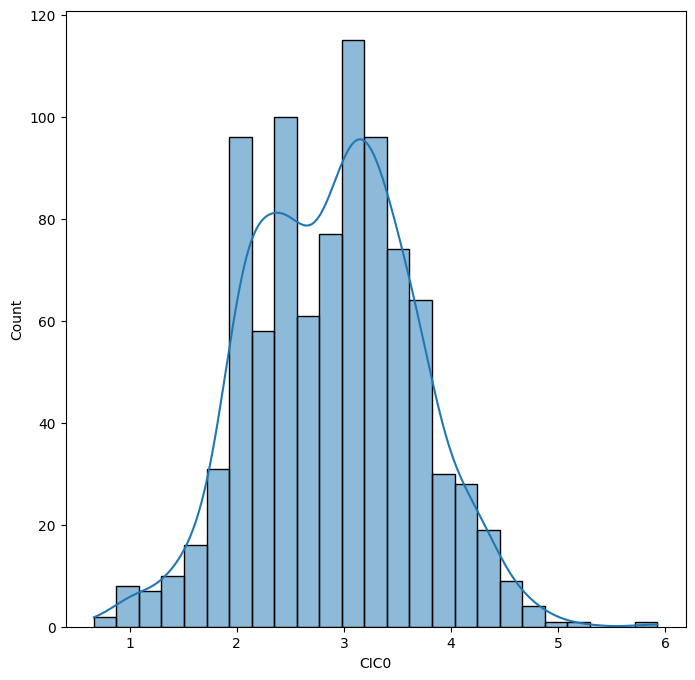

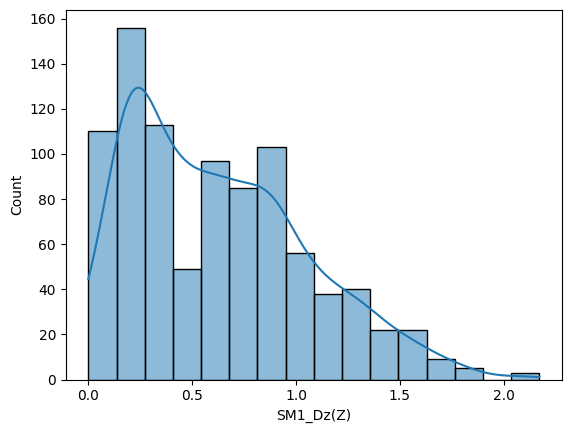

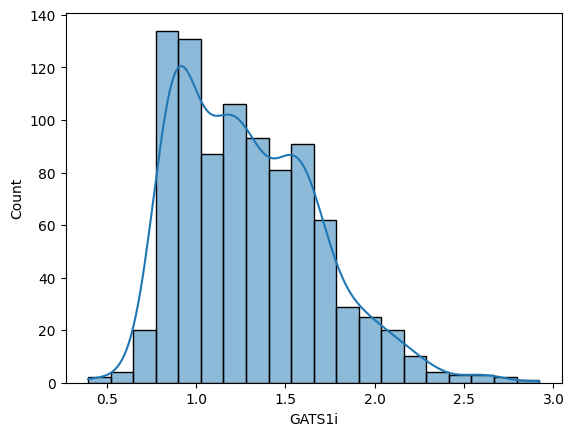

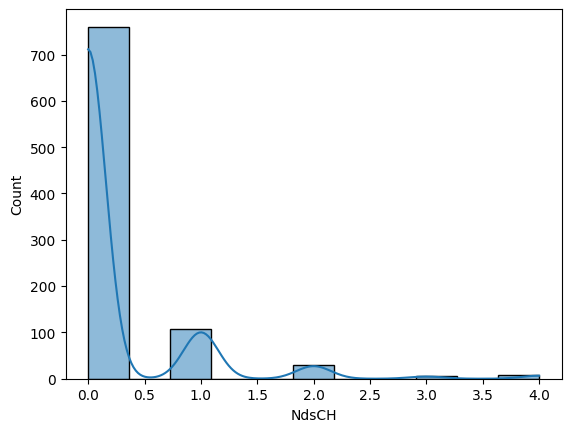

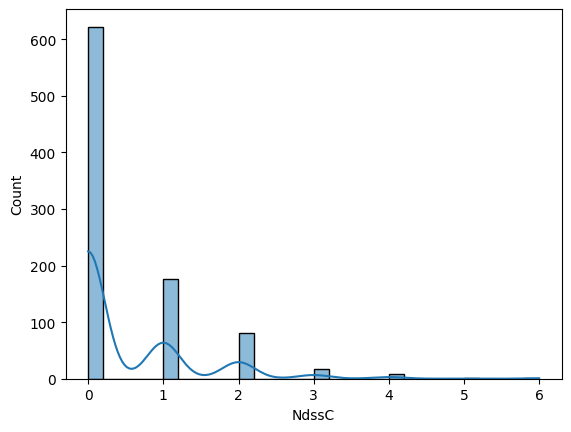

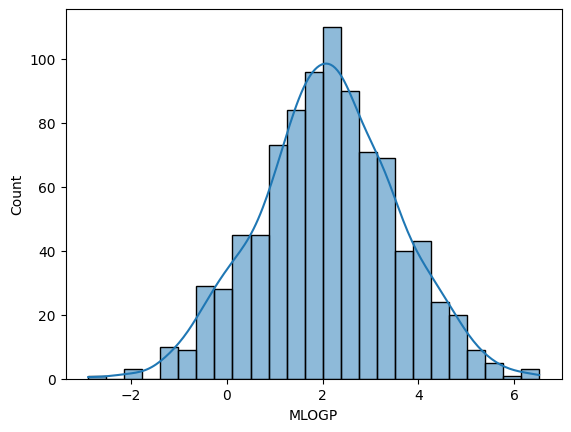

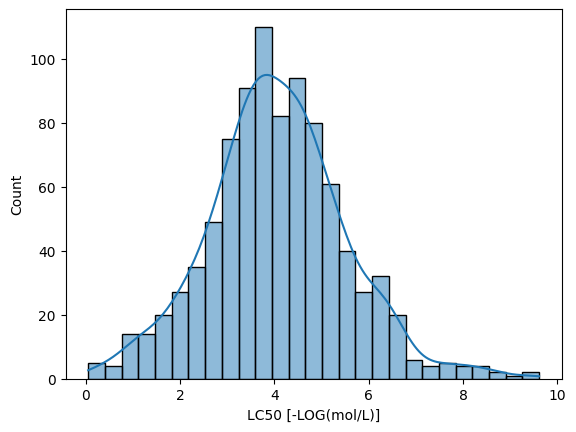

In [11]:
plt.figure(figsize=(8,8))
x=0
for i in df.columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [12]:
df.corr(method="pearson")

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50 [-LOG(mol/L)],0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


MLOGP has the highest correlation of 0.652 and GATS1i has the lowest correlation of -0.398

In [13]:
X = df.drop(labels=['LC50 [-LOG(mol/L)]'],axis=1)
#X = df.drop(labels=['LC50 [-LOG(mol/L)]','GATS1i'],axis=1)
y = df[['LC50 [-LOG(mol/L)]']]
#X, y = new_df.drop('LC50 [-LOG(mol/L)]', axis=1), df['LC50 [-LOG(mol/L)]']

In [14]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:

# min max on 1, std on 3
min_max=MinMaxScaler()
scaler = StandardScaler()

#df['MLOGP']=min_max.fit_transform(df[['MLOGP']])
df['MLOGP']=pd.DataFrame(scaler.fit_transform(df[['MLOGP']]))

df['CIC0']=pd.DataFrame(scaler.fit_transform(df[['CIC0']]))
df['SM1_Dz(Z)']=pd.DataFrame(scaler.fit_transform(df[['SM1_Dz(Z)']]))
df['GATS1i']=pd.DataFrame(scaler.fit_transform(df[['GATS1i']]))


In [16]:
y.head()

,LC50 [-LOG(mol/L)]
0,3.770
1,3.115
2,3.531
3,3.510
4,5.390


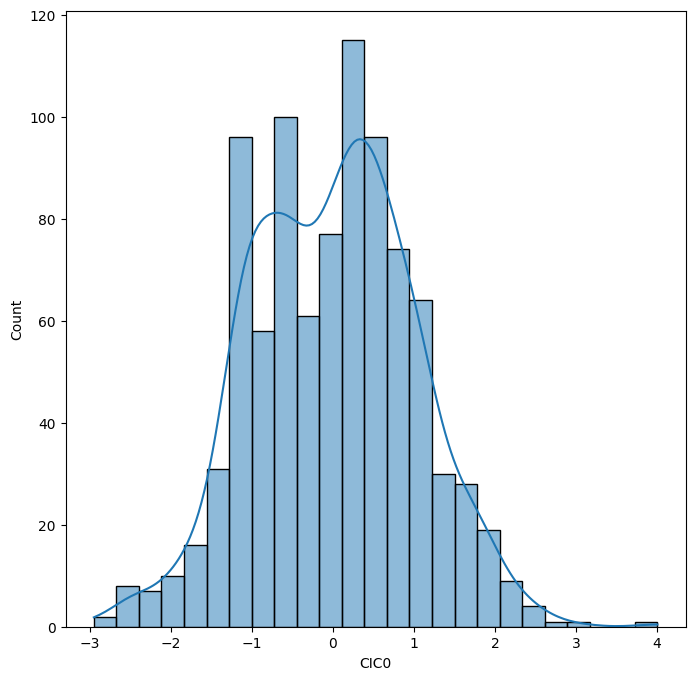

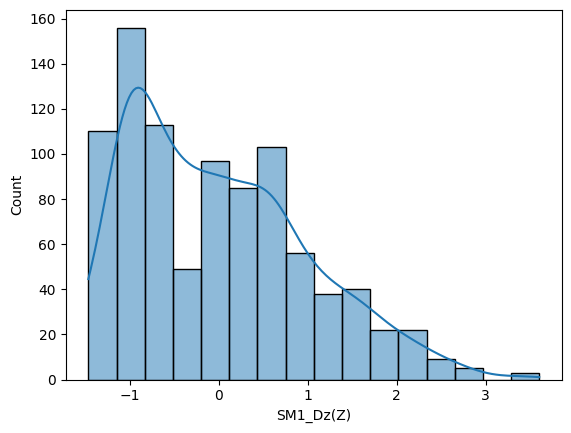

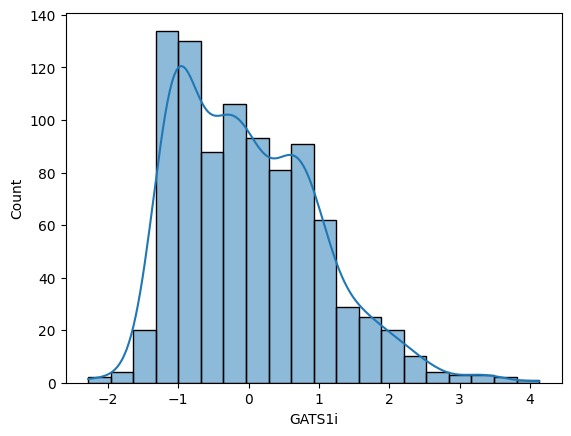

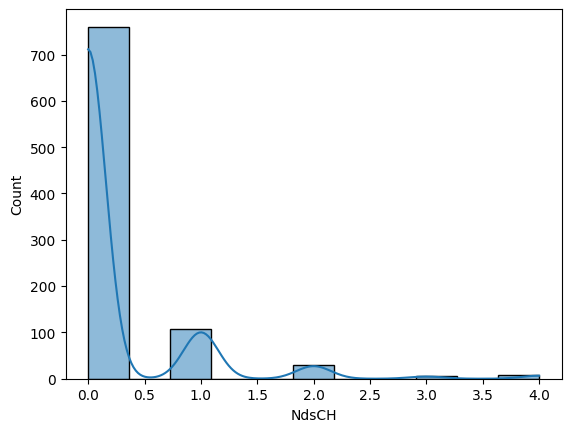

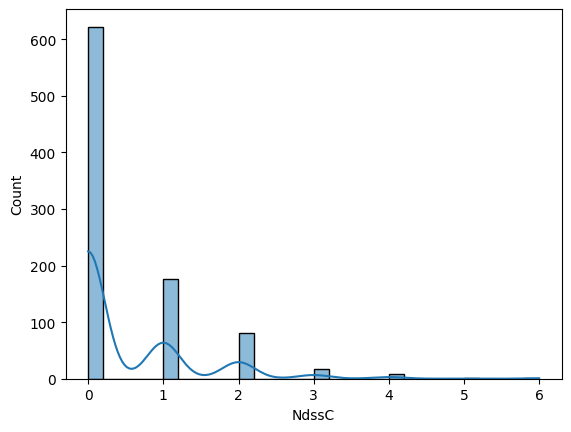

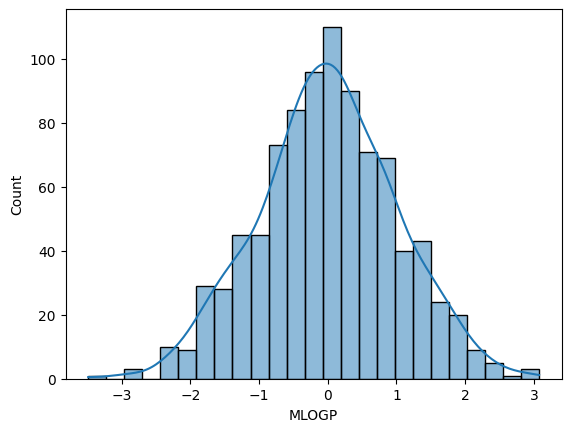

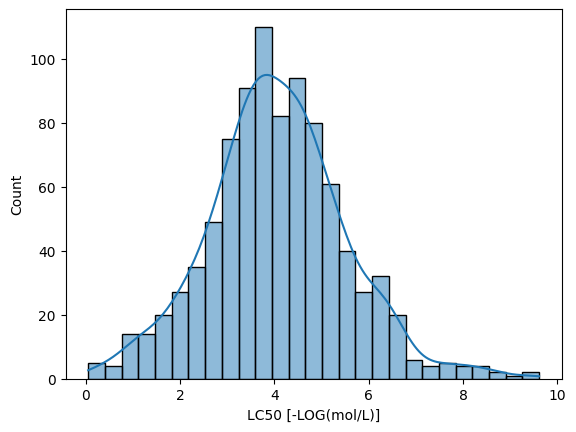

In [17]:
plt.figure(figsize=(8,8))
x=0
for i in df.columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

# KNN


In [18]:
knn_result = []

for k in range (2, 10):
    clf = Pipeline([
        ("scaler", scaler),
        ("knn", KNeighborsRegressor(n_neighbors=k))
        ])
    clf.fit(X_train, y_train)
    cross_val = cross_val_score(clf, X, y, cv=10)
    cross_val_avg = cross_val.mean()
    knn_result.append(cross_val_avg)
    print(f"R-Squared for k = {k} : {cross_val_avg:.3f}")

R-Squared for k = 2 : 0.501
R-Squared for k = 3 : 0.549
R-Squared for k = 4 : 0.574
R-Squared for k = 5 : 0.587
R-Squared for k = 6 : 0.582
R-Squared for k = 7 : 0.586
R-Squared for k = 8 : 0.591
R-Squared for k = 9 : 0.590


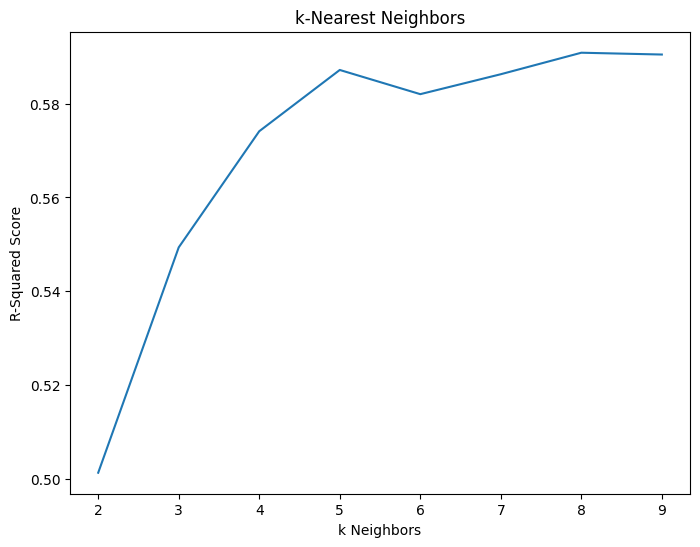

In [19]:
plt.figure(figsize=(8,6))
plt.plot([i for i in range(2, 10)], knn_result)
plt.xlabel("k Neighbors")
plt.ylabel("R-Squared Score")
plt.title("k-Nearest Neighbors")
plt.show()

In [63]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
knn_training_pred = knn.predict(X_train)
knn_training_rsq = knn.score(X_train, y_train)
knn_training_rmse = np.sqrt(mean_squared_error(y_train, knn_training_pred))
knn_training_mae = (mean_absolute_error(y_train, knn_training_pred))
print(f"R-Squared for the training set : {knn_training_rsq:.3f}")
print(f"RMSE for the training set : {knn_training_rmse:.3f}")
print(f"MAE for the training set : {knn_training_mae:.3f}")

R-Squared for the training set : 0.679
RMSE for the training set : 0.819
MAE for the training set : 0.582


In [64]:
knn_testing_pred = knn.predict(X_test)
knn_testing_rsq = knn.score(X_test, y_test)
knn_testing_rmse = np.sqrt(mean_squared_error(y_test, knn_testing_pred))
knn_testing_mae = (mean_absolute_error(y_test, knn_testing_pred))

print(f"R-Squared for the testing set : {knn_testing_rsq:.3f}")
print(f"RMSE for the testing set : {knn_testing_rmse:.3f}")
print(f"MAE for the testing set : {knn_testing_mae:.3f}")

R-Squared for the testing set : 0.600
RMSE for the testing set : 0.932
MAE for the testing set : 0.666


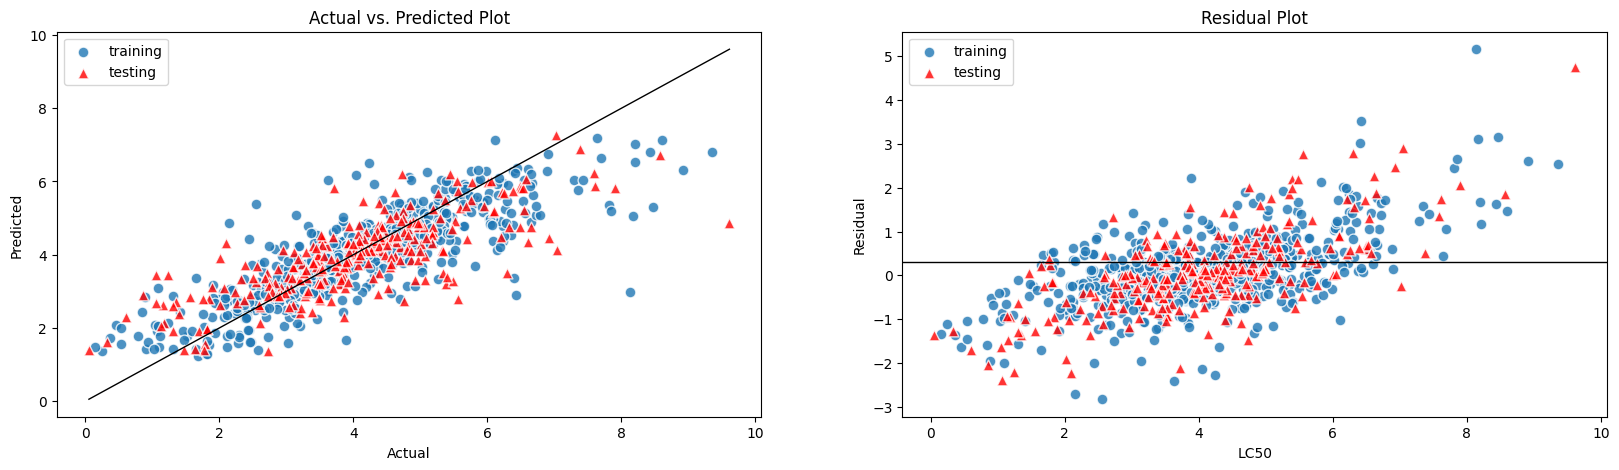

In [22]:
residual_train = y_train - knn_training_pred
residual_test = y_test - knn_testing_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, knn_training_pred, s=60, alpha=0.8, edgecolor="white", label="training")
ax1.scatter(y_test, knn_testing_pred, marker="^", s=60, c="r", alpha=0.8, edgecolor="white", label="testing")
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1)
ax1.set_title("Actual vs. Predicted Plot")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=60, edgecolor="white", alpha=0.8, label="training")
ax2.scatter(y_test, residual_test, marker="^", s=60, c="r", edgecolor="white", alpha=0.8, label="testing")
ax2.axhline(y=0.3, linewidth= 1, linestyle="-", c="black")
ax2.legend()
ax2.set_title("Residual Plot")
ax2.set_xlabel("LC50")
ax2.set_ylabel("Residual")

plt.show()

# Linear,Lasso,Ridge,Elasticnet

In [23]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
regression.coef_

array([[ 0.46495695,  1.32007167, -0.71214503,  0.3408065 ,  0.03360689,
         0.36272462]])

In [25]:
regression.intercept_

array([1.93696205])

In [26]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()

}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 0.9553145866931483
MAE: 0.6839516284865352
R2 score 58.063838821839255


Lasso
Model Training Performance
RMSE: 1.3284797082429638
MAE: 1.0029560874269323
R2 score 18.90282888871041


Ridge
Model Training Performance
RMSE: 0.9549678779293822
MAE: 0.6840257165187325
R2 score 58.094272767670205


Elasticnet
Model Training Performance
RMSE: 1.2150920506036698
MAE: 0.9129945400474734
R2 score 32.15556751624706




In [28]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

# Decession tree

In [29]:

regressor = DecisionTreeRegressor(random_state = 1, max_depth=40)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=40,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [30]:
regressor.score(X_train, y_train)


0.9938797489284813

In [31]:
predictions=regressor.predict(X_test)

In [32]:
r2_score(y_test,predictions)

0.2504102605932441

# Random forest
st

In [33]:
regressor2 = RandomForestRegressor(n_estimators = 400, random_state = 0)
regressor2.fit(X_train, y_train)

C:\Users\Shaad\AppData\Local\Temp\ipykernel_10856\1833023537.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor2.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:

regressor2.score(X_train, y_train)

0.9444386051619088

In [35]:
pred2=regressor2.predict(X_test)

In [36]:
r2_score(y_test,pred2)

0.5813794017440801

# SVR

In [37]:
from sklearn import svm

regressor = svm.SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)
svr_trainpred=regressor.predict(X_train)
r2_score(y_train,svr_trainpred)


e:\DataScience\LC50\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6538036309679027

In [38]:
svr_preds=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.5991631685291083

In [39]:
r2_score(y_pred,svr_preds)

-0.8686240095217121

In [40]:
import xgboost
import time


In [41]:
#Estimating optimum max_depth and n_estimators
start_time=time.time()
xgb_params=[]
depth=[1,3,6,9,12]
for d in depth:
  xgb=xgboost.XGBRegressor(objective ='reg:squarederror',max_depth=d).fit(X_train,y_train)
  xgb_params.append(xgb.score(X_train,y_train))
  print("R Squared value for max_depth ",d,"is ",xgb.score(X_train,y_train))
  p=xgb.predict(X_test)
  print("RMSE for testing max_depth ",d,"is ",np.sqrt(mean_squared_error(y_test,p)))

R Squared value for max_depth  1 is  0.6929968593260905
RMSE for testing max_depth  1 is  0.9858137938859327
R Squared value for max_depth  3 is  0.9292812362855548
RMSE for testing max_depth  3 is  0.9961033114963653
R Squared value for max_depth  6 is  0.9925192669229517
RMSE for testing max_depth  6 is  1.0494430587835484
R Squared value for max_depth  9 is  0.993877991590039
RMSE for testing max_depth  9 is  1.0714301641940096
R Squared value for max_depth  12 is  0.9938788155452243
RMSE for testing max_depth  12 is  1.0636208714620112


In [50]:
xgb_p=xgboost.XGBRegressor(objective='reg:squarederror',max_depth=1).fit(X_train,y_train)
training_time_xgb=time.time()-start_time

In [51]:
xgb_p_train_rscore=xgb_p.score(X_train,y_train)
start_time2=time.time()
xgb_p_train_pred=xgb_p.predict(X_train)
testing_time_xgb=time.time()-start_time2
xgb_p_train_rmse=np.sqrt(mean_squared_error(y_train,xgb_p_train_pred))

In [52]:
print("R squared for Training data: ", xgb_p_train_rscore)
print("Root Mean Squared Error for Training data: ", xgb_p_train_rmse)

R squared for Training data:  0.6929968593260905
Root Mean Squared Error for Training data:  0.8012235191708486


In [53]:
xgb_p_test_rscore=xgb_p.score(X_test,y_test)
start_time2=time.time()
xgb_p_test_pred=xgb_p.predict(X_test)
testing_time=time.time()-start_time2
xgb_p_test_rmse=np.sqrt(mean_squared_error(y_test,xgb_p_test_pred))
xgb_p_test_mae=mean_absolute_error(y_test,xgb_p_test_pred)

In [54]:
print("R squared for Testing data: ", xgb_p_test_rscore)
print("Root Mean Squared Error for Testing data: ", xgb_p_test_rmse)
print("Mean Absolute Error for Testing data: ", xgb_p_test_rmse)

R squared for Testing data:  0.5534340187596387
Root Mean Squared Error for Testing data:  0.9858137938859327
Mean Absolute Error for Testing data:  0.9858137938859327


In [55]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [56]:
start_time=time.time()
clf=svm.SVR(C=1,gamma=0.1)
clf.fit(X_train,y_train)
training_time_svm=time.time()-start_time


e:\DataScience\LC50\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
clf_train_rscore=clf.score(X_train,y_train)
clf_train_pred=clf.predict(X_train)
clf_train_rmse=np.sqrt(mean_squared_error(y_train,clf_train_pred))

In [58]:
print("R squared for Training data: ",clf_train_rscore)
print("Root Mean Squared Error for Training data: ", clf_train_rmse)

R squared for Training data:  0.651652350169271
Root Mean Squared Error for Training data:  0.853470908628521


In [59]:
clf_test_rscore=clf.score(X_test,y_test)
start_time2=time.time()
clf_test_pred=clf.predict(X_test)
testing_time_svm=time.time()-start_time2
clf_test_rmse=np.sqrt(mean_squared_error(y_test,clf_test_pred))
clf_test_mae=mean_absolute_error(y_test,clf_test_pred)

In [60]:
print("R squared for Testing data: ", clf_test_rscore)
print("Root Mean Squared Error for Testing data: ", clf_test_rmse)
print("Mean Absolute Error for Testing data: ", clf_test_mae)

R squared for Testing data:  0.5987938606664467
Root Mean Squared Error for Testing data:  0.9344065146706192
Mean Absolute Error for Testing data:  0.6433514295422481
